#  <span style="color:#3366ff"> <strong> Automatic image annotation / Dog Breed Recognition

#  <span style="color:#3366ff"> <strong> 20180913 (Part 2 Clustering)

<span style="color:#3366ff"> This notebook is dedicated to the features clustering.

<span style="color:#ff0000"> Create an "opencv2" environment & install this pack: https://anaconda.org/menpo/opencv

### Librairies Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image, ImageFilter, ImageOps

from sklearn import preprocessing, decomposition, cluster, metrics
from sklearn.feature_extraction import image

from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom

In [2]:
cv2.__version__

'3.4.3'

<strong> Feature already computed with "opencv 2.4" configuration

In [3]:
category_feature_= pd.read_csv(
    'DATA_clean/20180923_sift_feature.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

In [4]:
category_feature_.head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
"('n02085620_10074_0',)",11.0,64.0,18.0,0.0,0.0,0.0,0.0,1.0,161.0,133.0,...,0.0,0.0,0.0,9.0,79.0,4.0,0.0,0.0,0.0,0.0
"('n02085620_10074_1',)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,4.0,10.0,1.0,0.0,0.0,0.0,1.0,5.0
"('n02085620_10074_2',)",22.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,173.0,25.0,...,0.0,22.0,28.0,0.0,0.0,0.0,0.0,7.0,12.0,22.0
"('n02085620_10074_3',)",51.0,9.0,9.0,19.0,0.0,0.0,0.0,12.0,173.0,94.0,...,0.0,6.0,8.0,2.0,0.0,1.0,20.0,8.0,0.0,3.0
"('n02085620_10074_4',)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,5.0,...,0.0,16.0,44.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
"('n02085620_10074_5',)",21.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,170.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
"('n02085620_10074_6',)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91.0,23.0,0.0,0.0
"('n02085620_10074_7',)",1.0,0.0,0.0,0.0,26.0,112.0,2.0,1.0,79.0,1.0,...,5.0,51.0,50.0,16.0,2.0,8.0,4.0,0.0,0.0,2.0
"('n02085620_10074_8',)",12.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,143.0,...,0.0,6.0,16.0,88.0,42.0,0.0,0.0,0.0,0.0,1.0
"('n02085620_10074_9',)",19.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,171.0,5.0,...,0.0,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


# Dimensions Réduction

### 2 first PCA

In [5]:
# preprocessing
category_feature_prepro = preprocessing.scale(category_feature_)

pca = decomposition.PCA(n_components=2)
pca.fit(category_feature_prepro)
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.09262092 0.15752833]


In [6]:
category_feature_prepro_trans= pca.transform(category_feature_prepro)

# Cette base mesure
shape = category_feature_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "features decrits avec", shape[1], "CP.")

Le tableau des Composantes Principales contient 45170 features decrits avec 2 CP.


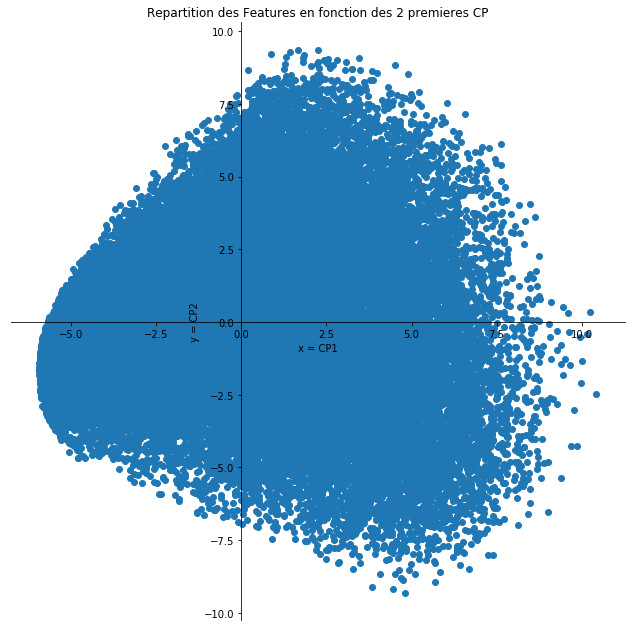

In [7]:
fig = plt.figure(figsize=(11,11))

ax = plt.subplot()
ax.set_title('Repartition des Features en fonction des 2 premieres CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(category_feature_prepro_trans[:,0], category_feature_prepro_trans[:,1])

(-0.3, 0.3)

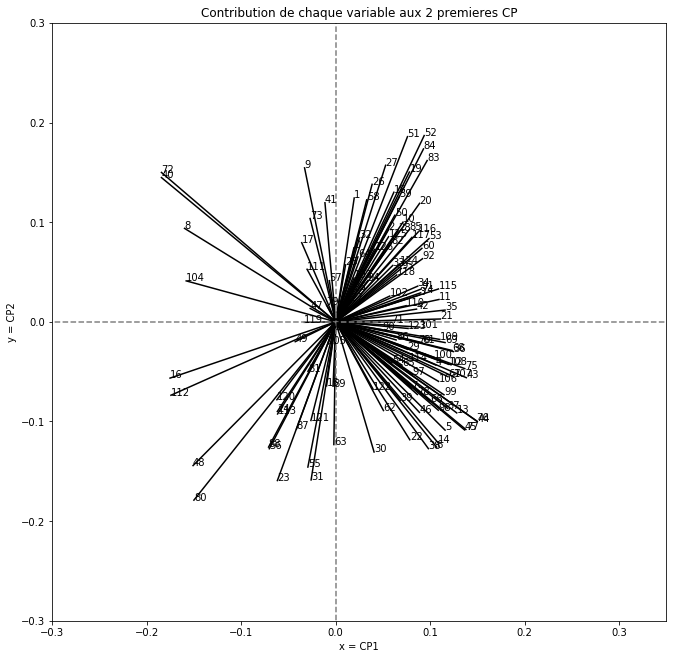

In [37]:
pcs = pca.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premieres CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, category_feature_.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.3, 0.35])
plt.ylim([-0.3, 0.3])

PCA 3 

In [9]:
# preprocessing
category_feature_prepro = preprocessing.scale(category_feature_)

pca3 = decomposition.PCA(n_components=3)
pca3.fit(category_feature_prepro)
print("Variance des 3 premieres composantes principales", 
      pca3.explained_variance_ratio_.cumsum())

Variance des 3 premieres composantes principales [0.09262092 0.15752834 0.22241286]


In [10]:
category_feature_prepro_trans3= pca3.transform(category_feature_prepro)

# Cette base mesure
shape3 = category_feature_prepro_trans3.shape

print("Le tableau des Composantes Principales contient",shape3[0], 
      "features decrits avec", shape3[1], "CP.")

Le tableau des Composantes Principales contient 45170 features decrits avec 3 CP.


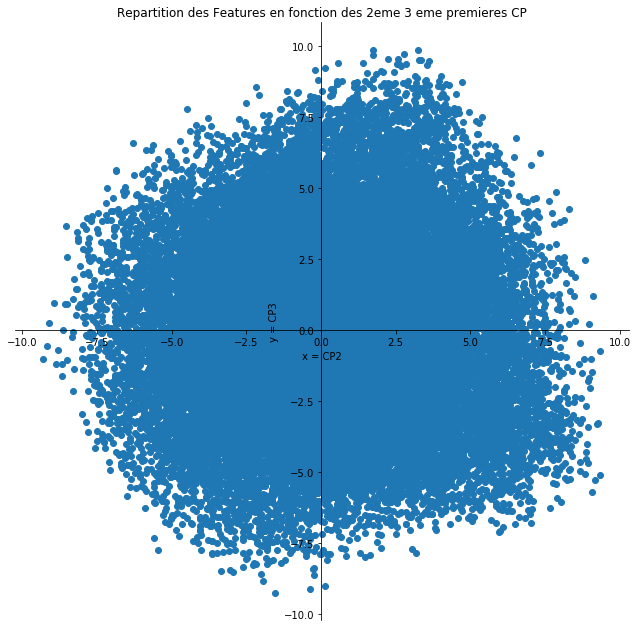

In [11]:
fig = plt.figure(figsize=(11,11))

ax = plt.subplot()
ax.set_title('Repartition des Features en fonction des 2eme 3 eme premieres CP')
plt.ylabel("y = CP3")
plt.xlabel("x = CP2")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(category_feature_prepro_trans3[:,1], category_feature_prepro_trans3[:,2])

(-0.3, 0.3)

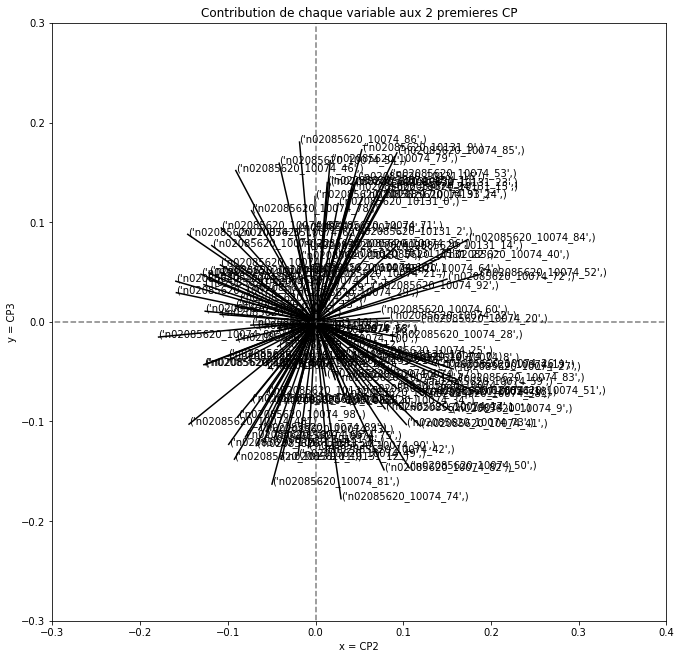

In [12]:
pcs3 = pca3.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premieres CP')
plt.ylabel("y = CP3")
plt.xlabel("x = CP2")

for i , (x, y) in enumerate(zip(pcs3[1, :], pcs3[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, category_feature_.index[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.3, 0.4])
plt.ylim([-0.3, 0.3])

## Visual words dictionnary

Pour créer le "dictionnaire" de visual words, il suffit d'appliquer un algorithme de clustering aux descripteurs de features construits à l'étape 1, comme le k-means. Les visual words correspondent alors aux centres des clusters trouvés.

In [13]:
p1 = pd.DataFrame(category_feature_prepro_trans[:,0])
p2 = pd.DataFrame(category_feature_prepro_trans[:,1])
p2.head()

,0
0,2.504749
1,-3.155721
2,-0.255195
3,1.952139
4,-0.919613


In [14]:
test = pd.concat([p1,p2], axis=1)
test.head()

,0,0
0,-1.977054,2.504749
1,-2.611701,-3.155721
2,-5.328024,-0.255195
3,-3.680509,1.952139
4,-5.795070,-0.919613


In [15]:
test.shape

(45170, 2)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(test,
                                                    test,
                                                    test_size=0.75)

In [17]:
X_train.shape

(11292, 2)

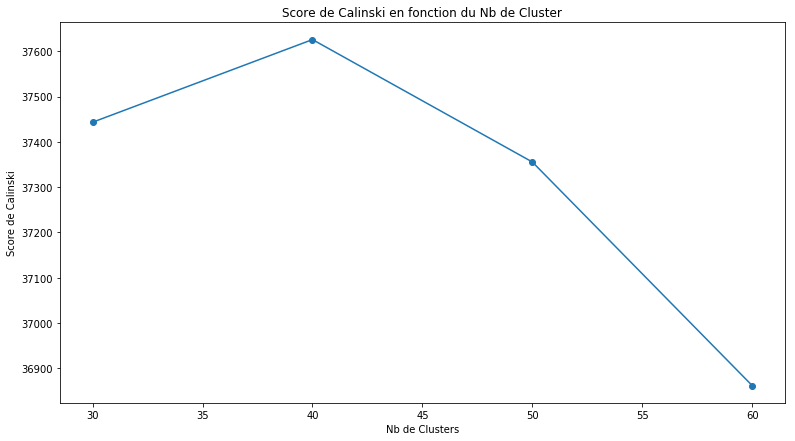

In [38]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
silhouettes = []
for num_cluster in range(30,70,10):
    cls_kmean= cluster.KMeans(num_cluster,
                              n_init=1,
                              init='random')
    cls_kmean.fit(category_feature_prepro_trans)
    
    cali = metrics.calinski_harabaz_score(category_feature_prepro_trans, cls_kmean.labels_)
    calinski.append(cali)
    
    silh = metrics.silhouette_score(category_feature_prepro_trans, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(30, 70, 10), calinski, marker='o')

<span style="color:#3366ff"> Best clustering: 40.

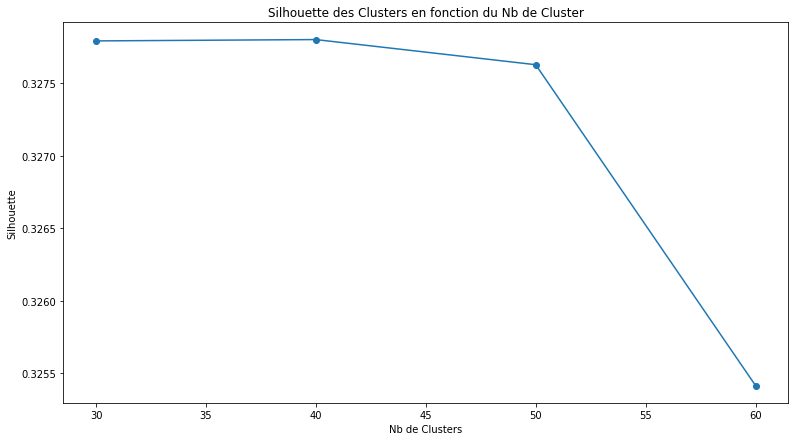

In [39]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")
    
plt.plot(range(30,70, 10), silhouettes, marker='o')

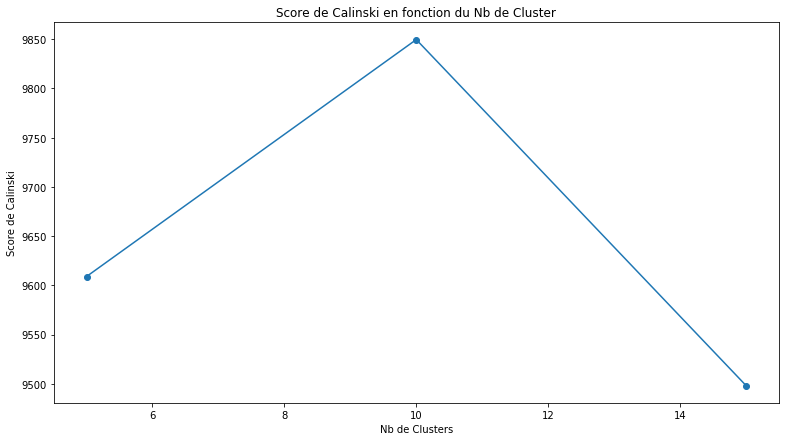

In [20]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
silhouettes = []
for num_cluster in range(5,20, 5):
    cls_kmean= cluster.KMeans(num_cluster,
                              n_init=1,
                              init='random')
    cls_kmean.fit(X_train)
    
    cali = metrics.calinski_harabaz_score(X_train, cls_kmean.labels_)
    calinski.append(cali)
    
    silh = metrics.silhouette_score(X_train, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(5,20, 5), calinski, marker='o')

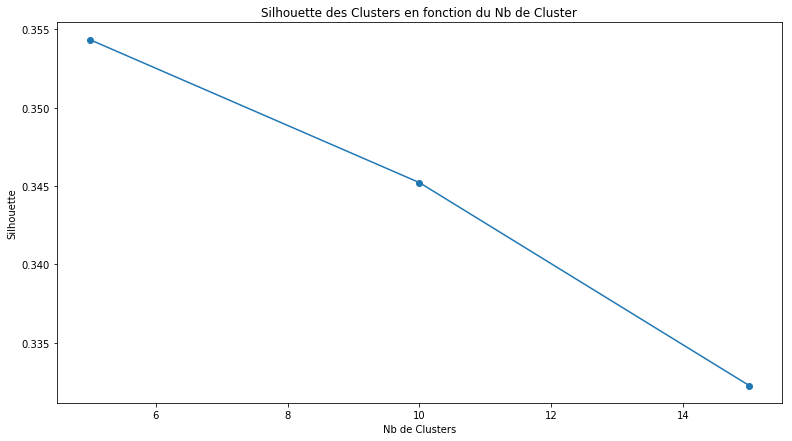

In [21]:
plt.figure(figsize=(13,7))

plt.title('Silhouette des Clusters en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")
    
plt.plot(range(5,20,5), silhouettes, marker='o')

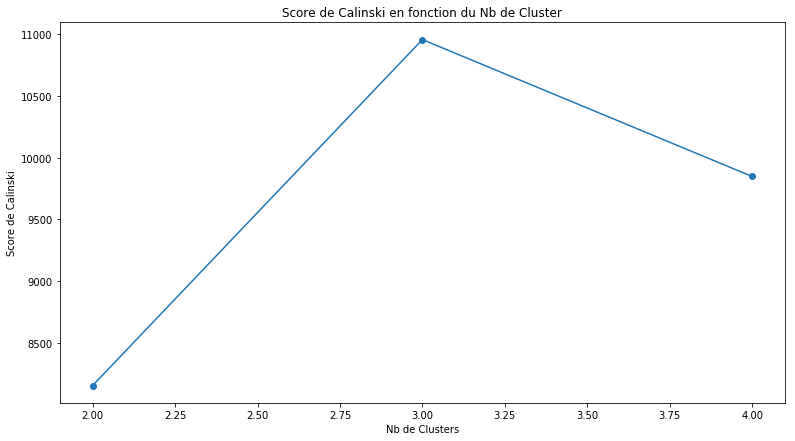

In [22]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

calinski = []
silhouettes = []
for num_cluster in range(2,5, 1):
    cls_kmean= cluster.KMeans(num_cluster,
                              n_init=1,
                              init='random')
    cls_kmean.fit(X_train)
    
    cali = metrics.calinski_harabaz_score(X_train, cls_kmean.labels_)
    calinski.append(cali)
    
    silh = metrics.silhouette_score(X_train, cls_kmean.labels_)
    silhouettes.append(silh)

plt.plot(range(2,5, 1), calinski, marker='o')